# PREDICTION ON GRADUATE ADMISSIONS

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('graduation dataset.zip')

# Display Top 5 Rows of The Dataset

In [3]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


# Check Last 5 Rows of The Dataset

In [4]:
data.tail()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73
499,327,113,4,4.5,4.5,9.04,0,0.84


# Find Shape of Our Dataset (Number of Rows And Number of Columns) 

In [5]:
data.shape

(500, 8)

In [6]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 500
Number of Columns 8


# Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


# .Check Null Values In The Dataset

In [8]:
data.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

# Get Overall Statistics About The Dataset

In [9]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


# Dropping Irrelevant Features

In [10]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [11]:
data = data.drop('GRE Score',axis=1)

In [12]:
data.columns

Index(['TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research',
       'Chance of Admit '],
      dtype='object')

# Store Feature Matrix In X and Response(Target) In Vector y

In [13]:
data.head(1)

,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,118,4,4.5,4.5,9.65,1,0.92


In [14]:
X = data.drop('Chance of Admit ',axis=1)

In [15]:
y = data['Chance of Admit ']

# Splitting The Dataset Into The Training Set And Test Set

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [18]:
y_train

249    0.77
433    0.71
19     0.62
322    0.72
332    0.75
       ... 
106    0.87
270    0.72
348    0.57
435    0.55
102    0.62
Name: Chance of Admit , Length: 400, dtype: float64

# Feature Scaling

In [19]:
data.head()

,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,118,4,4.5,4.5,9.65,1,0.92
1,107,4,4.0,4.5,8.87,1,0.76
2,104,3,3.0,3.5,8.00,1,0.72
3,110,3,3.5,2.5,8.67,1,0.80
4,103,2,2.0,3.0,8.21,0,0.65


In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
sc = StandardScaler()

In [22]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [23]:
X_train

array([[ 0.6024183 , -0.09829757,  0.12679578,  0.56498381,  0.4150183 ,
         0.89543386],
       [ 0.6024183 ,  0.7754586 ,  0.63397891,  1.65149114, -0.06785154,
        -1.11677706],
       [-0.87691722, -0.09829757,  0.12679578, -0.52152352, -0.13445427,
        -1.11677706],
       ...,
       [-1.37002906, -1.8458099 , -1.39475361, -1.60803084, -2.2157898 ,
        -1.11677706],
       [-0.38380538, -0.97205374, -0.88757048,  0.56498381, -1.49981038,
        -1.11677706],
       [-0.21943477, -0.97205374,  0.63397891,  0.02173015, -0.55072138,
        -1.11677706]])

# Import The models

In [24]:
data.head()

,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,118,4,4.5,4.5,9.65,1,0.92
1,107,4,4.0,4.5,8.87,1,0.76
2,104,3,3.0,3.5,8.00,1,0.72
3,110,3,3.5,2.5,8.67,1,0.80
4,103,2,2.0,3.0,8.21,0,0.65


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Model Training

In [26]:
lr =LinearRegression()
lr.fit(X_train,y_train)

svm = SVR()
svm.fit(X_train,y_train)

rf = RandomForestRegressor()
rf.fit(X_train,y_train)

gr = GradientBoostingRegressor()
gr.fit(X_train,y_train)

GradientBoostingRegressor()

# Prediction on Test Data

In [27]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gr.predict(X_test)

# Evaluating the Algorithm

In [28]:
from sklearn import metrics

In [29]:
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)

In [30]:
print(score1,score2,score3,score4)

0.8285335139224478 0.7565295307289884 0.8146481026894864 0.8181354876897295


In [31]:
final_data = pd.DataFrame({'Models':['LR','SVR','RF','GR'],
                          'R2_SCORE':[score1,score2,score3,score4]})

In [32]:
final_data

,Models,R2_SCORE
0,LR,0.828534
1,SVR,0.756530
2,RF,0.814648
3,GR,0.818135


In [33]:
import seaborn as sns

<Axes: >

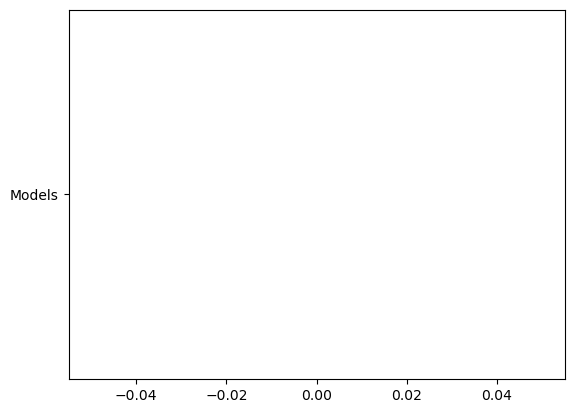

In [37]:
sns.lineplot('Models')

# Evaluating the Algorithm

In [38]:
data.head()

,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,118,4,4.5,4.5,9.65,1,0.92
1,107,4,4.0,4.5,8.87,1,0.76
2,104,3,3.0,3.5,8.00,1,0.72
3,110,3,3.5,2.5,8.67,1,0.80
4,103,2,2.0,3.0,8.21,0,0.65


In [39]:
import numpy as np

In [40]:
y_train = [1 if value>0.8 else 0 for value in y_train]
y_test = [1 if value>0.8 else 0 for value in y_test]

y_train = np.array(y_train)
y_test = np.array(y_test)

In [41]:
y_train

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,

# Import The models

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Model Training & Evaluation

In [43]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred1= lr.predict(X_test)
print(accuracy_score(y_test,y_pred1))

0.96


In [44]:
svm = svm.SVC()
svm.fit(X_train,y_train)
y_pred2 = svm.predict(X_test)
print(accuracy_score(y_test,y_pred2))

0.96


In [45]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred4 = rf.predict(X_test)
print(accuracy_score(y_test,y_pred4))

0.95


In [46]:
gr = GradientBoostingClassifier()
gr.fit(X_train,y_train)
y_pred5 = gr.predict(X_test)
print(accuracy_score(y_test,y_pred5))

0.97


# Save The Model

In [47]:
data.columns

Index(['TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research',
       'Chance of Admit '],
      dtype='object')

In [48]:
X = data.drop('Chance of Admit ',axis=1)

In [49]:
y = data['Chance of Admit ']

In [50]:
y  = [1 if value>0.8 else 0 for value in y]

In [51]:
y = np.array(y)

In [52]:

y

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,

In [53]:
X = sc.fit_transform(X)

In [54]:
X

array([[ 1.77886545,  0.77558214,  1.13735981,  1.09894429,  1.77680627,
         0.88640526],
       [-0.03160087,  0.77558214,  0.63231549,  1.09894429,  0.48585943,
         0.88640526],
       [-0.52536441, -0.09979274, -0.37777315,  0.01730621, -0.95404281,
         0.88640526],
       ...,
       [ 2.10804114,  1.65095702,  1.13735981,  1.63976333,  1.62785086,
         0.88640526],
       [-0.68995225,  0.77558214,  0.63231549,  1.63976333, -0.24236699,
        -1.12815215],
       [ 0.95592621,  0.77558214,  1.13735981,  1.09894429,  0.76721964,
        -1.12815215]])

In [55]:
gr = GradientBoostingClassifier()
gr.fit(X,y)

GradientBoostingClassifier()

In [56]:
import joblib

In [57]:
joblib.dump(gr,'admission_model')

['admission_model']

In [58]:
model = joblib.load('admission_model')

In [59]:
data.columns

Index(['TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research',
       'Chance of Admit '],
      dtype='object')

In [60]:
from tkinter import *
import joblib
from sklearn.preprocessing import StandardScaler 